Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
#Columns full names
#columns=['Wins','Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','Stolen Bases',
#         'Runs Allowed','Earned Runs','Earned Run Average','Shutouts','Saves','Error']

In [6]:
# To display all columns 
pd.set_option('display.max_columns', None)

In [7]:
#Checking the columns
df.shape

(30, 17)

In this dataset there are 30 rows and 17 columns are present

In [8]:
#Checking the various columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
#Checking the data types of the columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


1-30 rows and 17 columns are present in our dataset.

2-All the columns are in int64 data type except ERA.

3-ERA column data is in float64.

## Summary Statistics

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation:

1-Standard deviation is maximun in SO(Strikeouts).

2-Minimum number wins is 63 and Maximun number of wins is 100.

3-In HR,SB,ER,SHO,SV,E columns the difference between 75% and max is more so in these columns outliers may be 
   present.

4-The minimum run scored is 573.

In [12]:
#Checking the unique wins
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [13]:
#Checking the value counts for wins.
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

Observation:

1-According to our dataset most frequent wins is 68.It happens three times.

2-Also a team wins games for two times is for 83,81,76,74.

### Checking for Missing values

In [14]:
#Checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation:

There is no null Value in our dataset. We can also see this with the help of Visualization for better clearity.

<AxesSubplot:>

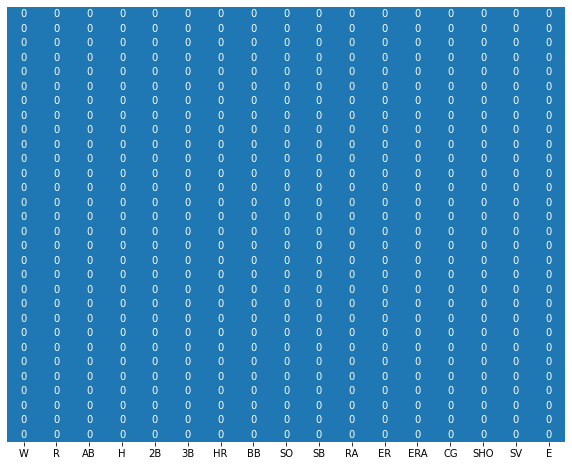

In [15]:
#Seeing the null value with the help of heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab10',annot=True)

Observation:

From this visualization we can clearly see that there is no missing values present in our dataset.

## check the correlation

In [16]:
df_cor=df.corr()
df_cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

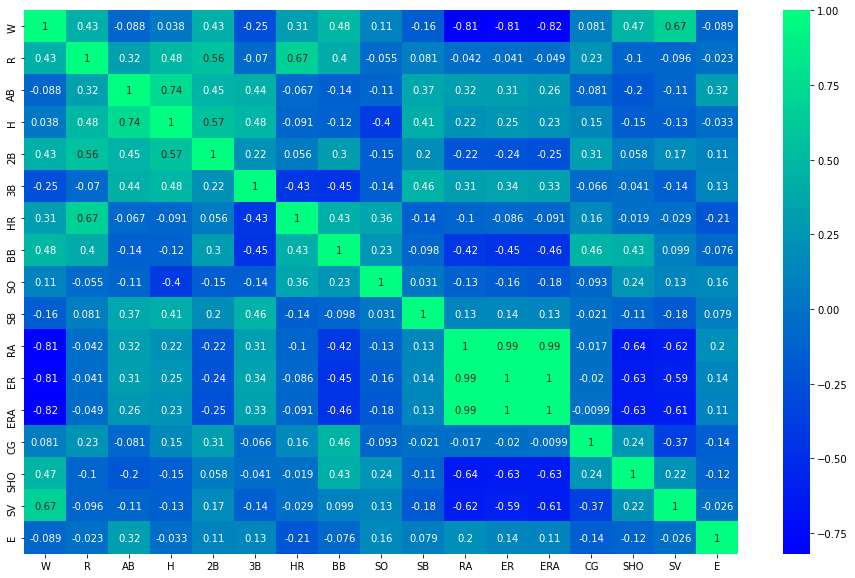

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(df_cor,annot=True,cmap='winter')

Observation:

1-RA,ERA,ER is highly negatively correlated with wins.

2-SV,SHO is negatively correlated with RA,ERA,ER.

## Data Visualization

### Univariate Analysis

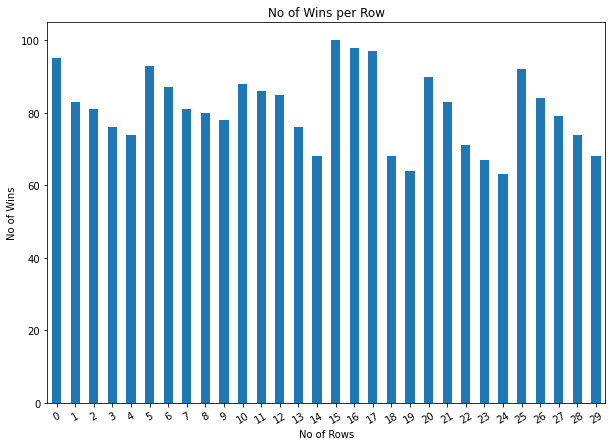

In [18]:
plt.figure(figsize=(10,7))
df['W'].plot.bar()
plt.ylabel('No of Wins')
plt.xlabel('No of Rows')
plt.xticks(rotation=30)
plt.title("No of Wins per Row")
plt.show()

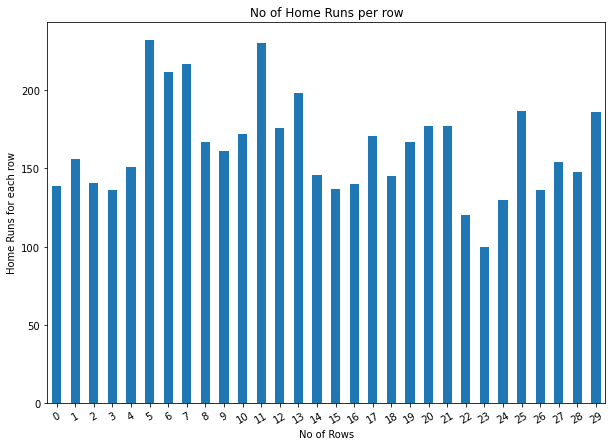

In [19]:
plt.figure(figsize=(10,7))
df['HR'].plot.bar()
plt.ylabel('Home Runs for each row')
plt.xlabel('No of Rows')
plt.xticks(rotation=30)
plt.title("No of Home Runs per row")
plt.show()

Observation:

1-Row 5 makes 232 home run.

2-Row 23 makes 99 home run

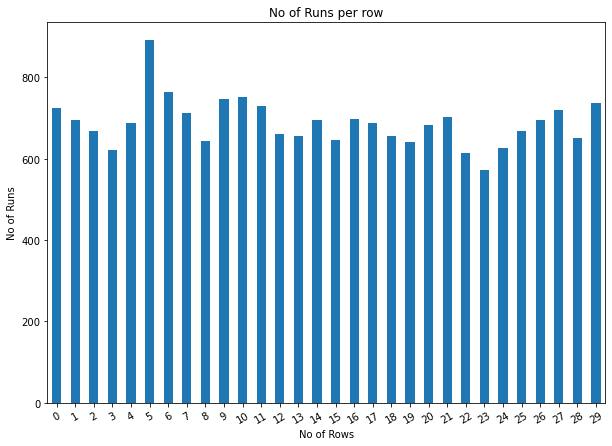

In [20]:
plt.figure(figsize=(10,7))
df['R'].plot.bar()
plt.ylabel('No of Runs')
plt.xlabel('No of Rows')
plt.xticks(rotation=30)
plt.title("No of Runs per row")
plt.show()

Observation:

1-Row 5 makes more than 900 runs.

2-Row 23 makes 600 runs approx.

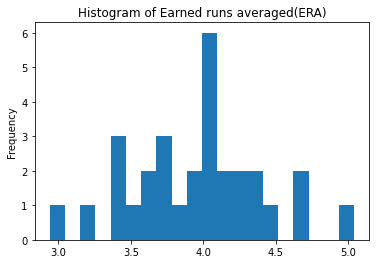

In [21]:
df['ERA'].plot.hist(bins=20)
plt.title("Histogram of Earned runs averaged(ERA)")
plt.show()

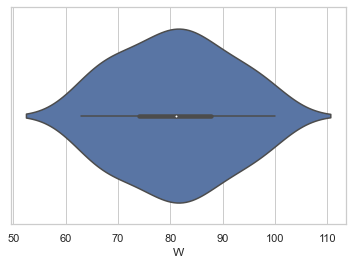

In [22]:
sns.set(style='whitegrid')
sns.violinplot(df['W'])
plt.show()

Observation: Maximum wins is between 70 to 90.

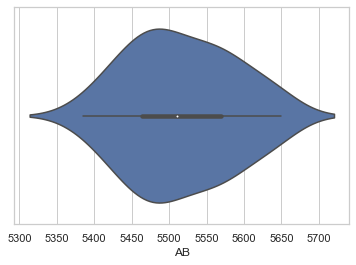

In [23]:
sns.violinplot(df['AB'])
plt.show()

Observation: Mostly AB is between 5450 to 5500.

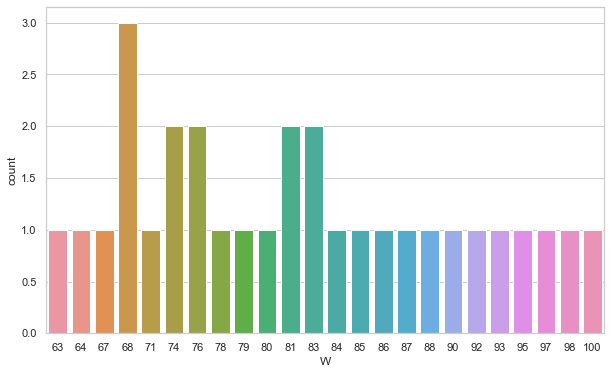

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df['W'])
plt.show()

Observation:

1-No of Wins for 68 times is three times.

2-No of Wins for 74,76,81,83,is two times.

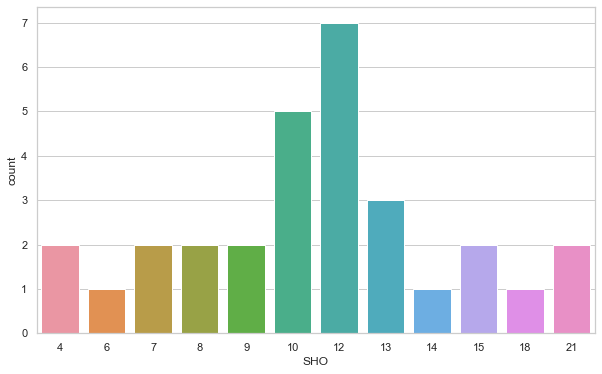

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(df['SHO'])
plt.show()

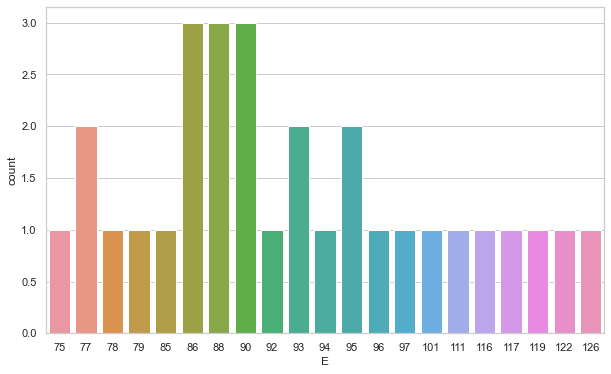

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(df['E'])
plt.show()

### Bivariate Analysis

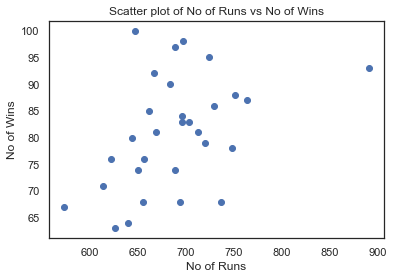

In [27]:
sns.set(style='white')
plt.scatter(df['R'],df['W'])
plt.xlabel('No of Runs')
plt.ylabel('No of Wins')
plt.title("Scatter plot of No of Runs vs No of Wins")
plt.show()

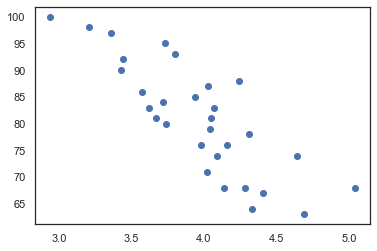

In [28]:
plt.scatter(df['ERA'],df['W'])
plt.show()

Observation:

1-When Value of ERA is less than 3.5 than winning chance is more than 90.

2-When value of ERA is more than 4.2 than winning chance is less than 70.

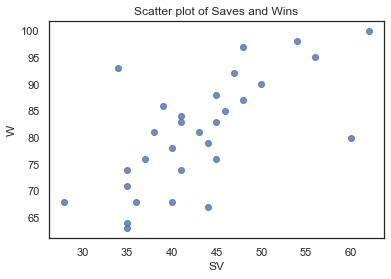

In [29]:
sns.regplot(x='SV',y='W',data=df,fit_reg=False)
plt.title('Scatter plot of Saves and Wins')
plt.show()

Observation:

1- Winning is more when SV value is more than 42 and minimum when SV value below than 45.

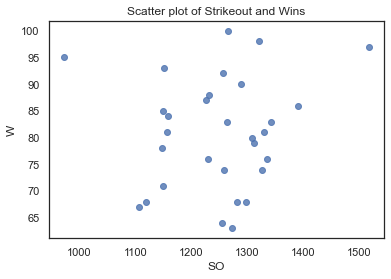

In [30]:
sns.regplot(x='SO',y='W',data=df,fit_reg=False)
plt.title('Scatter plot of Strikeout and Wins')
plt.show()

Observation:

Winning is more than 75 times when strikeout value is between 1150 to 1350.

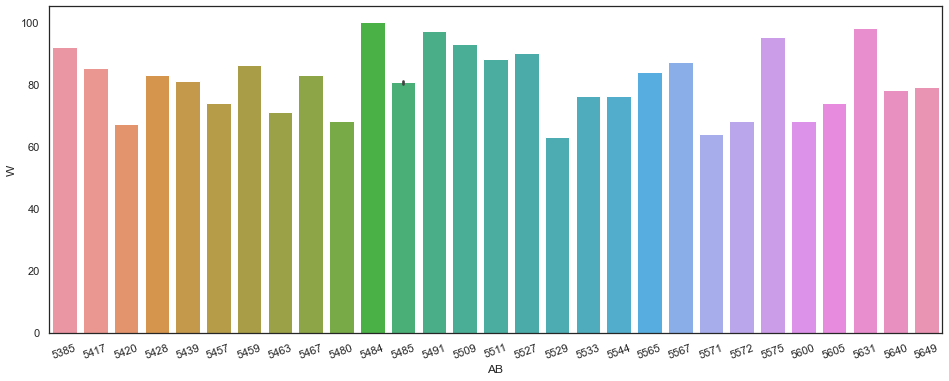

In [31]:
plt.figure(figsize=(16,6))
sns.barplot(x='AB',y='W',data=df)
plt.xticks(rotation=20)
plt.show()

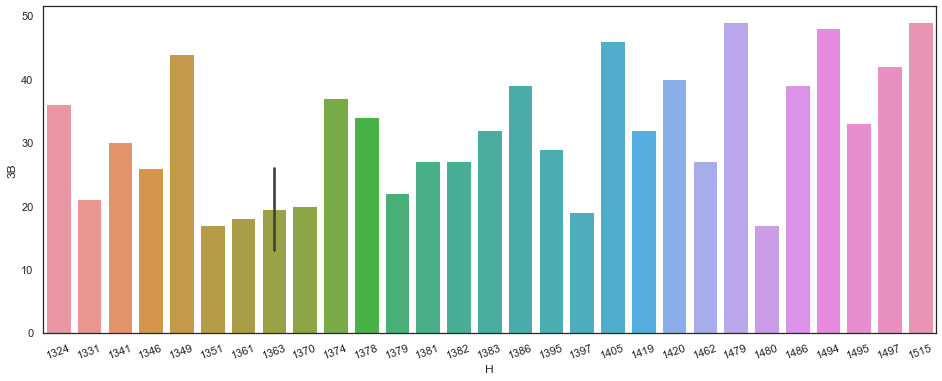

In [32]:
plt.figure(figsize=(16,6))
sns.barplot(x='H',y='3B',data=df)
plt.xticks(rotation=20)
plt.show()

### Outliers

<AxesSubplot:>

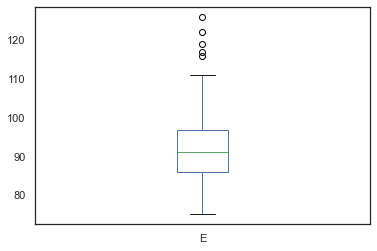

In [33]:
df['E'].plot.box()

<AxesSubplot:>

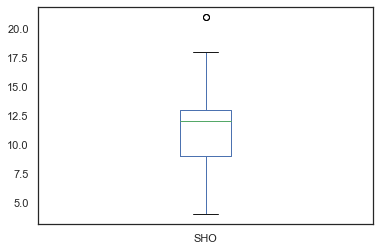

In [34]:
df['SHO'].plot.box()

In [35]:
df.shape

(30, 17)

In [36]:
collist=df.columns.values
ncol=17
nrow=10

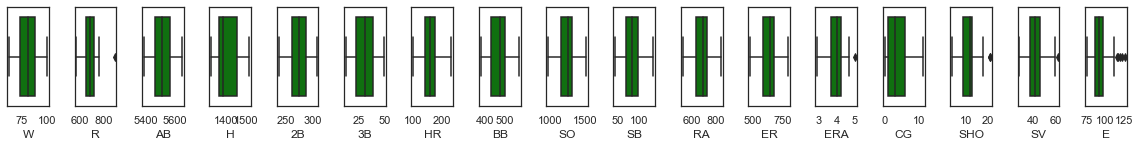

In [37]:
plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### To check the distribution of Skewness

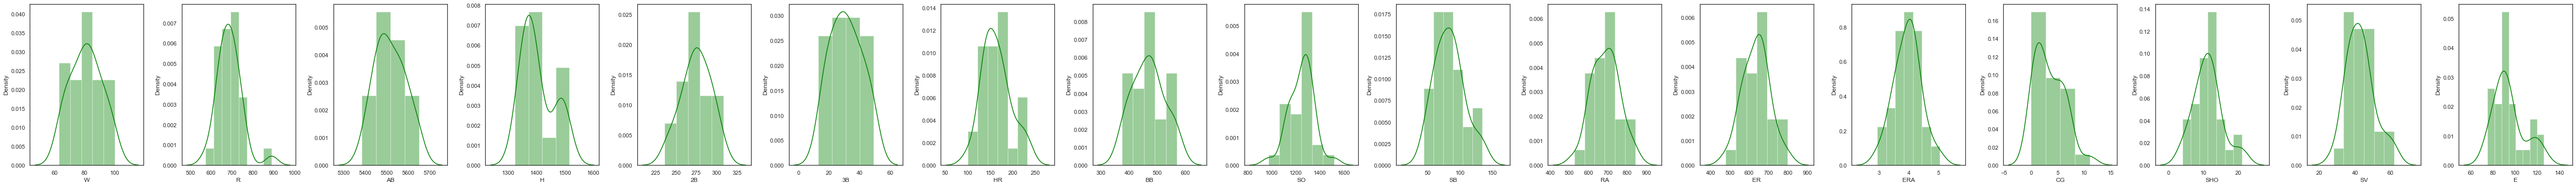

In [38]:
plt.figure(figsize=(70,50))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

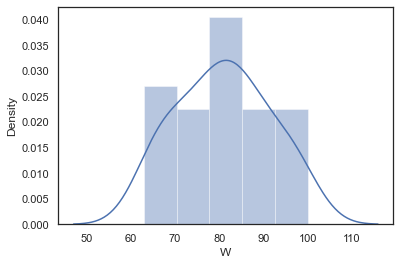

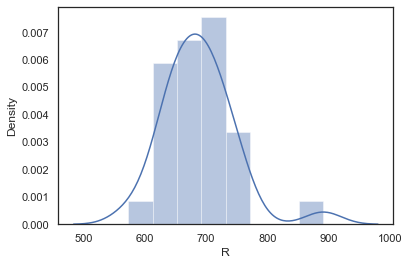

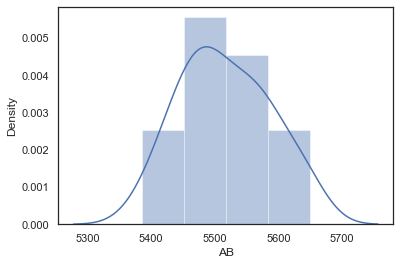

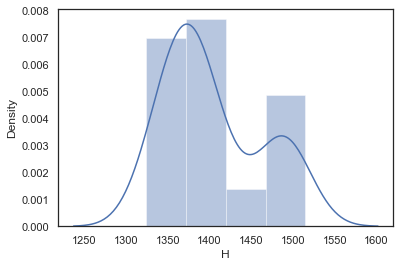

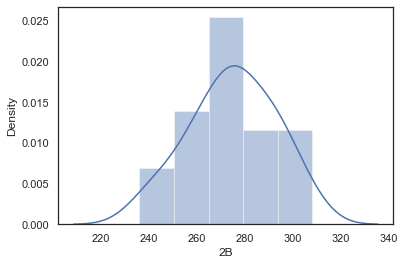

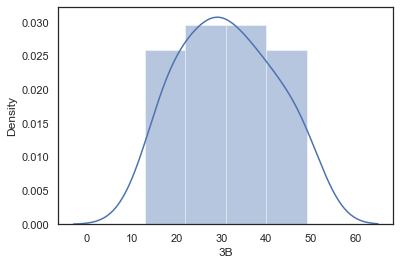

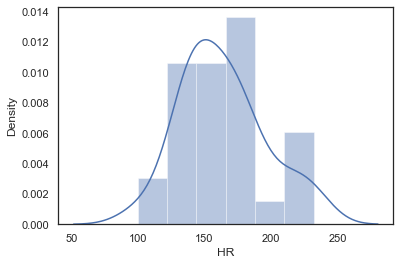

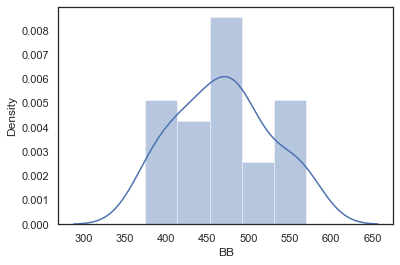

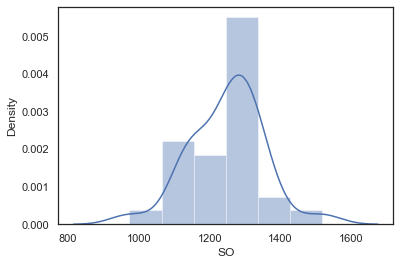

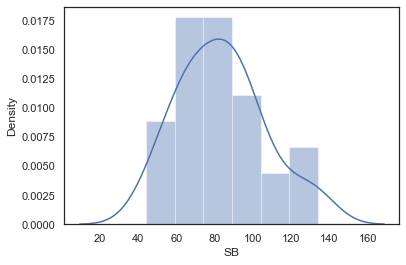

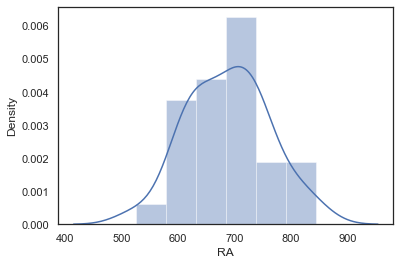

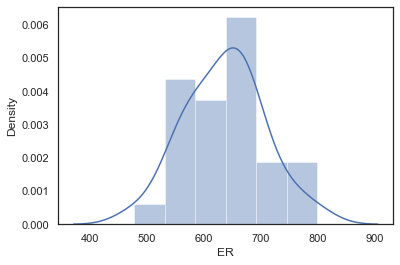

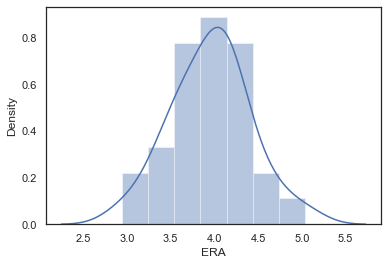

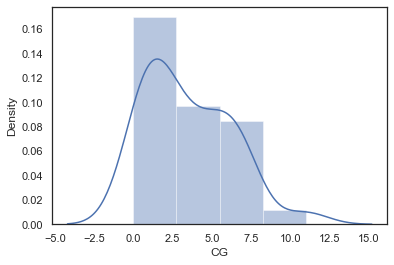

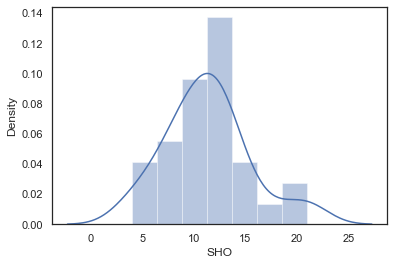

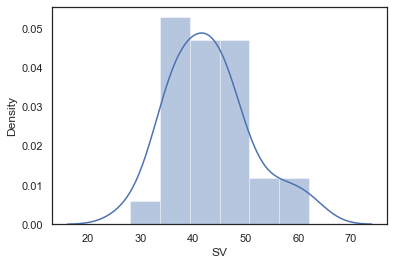

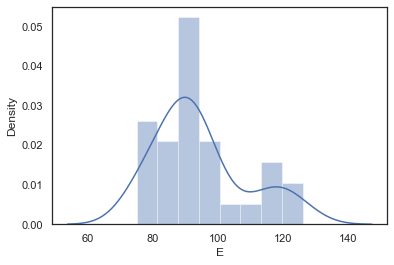

In [39]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [40]:
#Checking skewness of data
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [41]:
#Treating skewness via log method

for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [42]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

### Removing outliers

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.3654086 , 0.66532946, 0.84773126, 1.64938177, 1.42017307,
        1.04119304, 0.7872986 , 1.53490242, 2.69762957, 0.91388329,
        0.66623393, 0.50511008, 0.50695519, 0.27892148, 0.72910756,
        1.58127344, 0.42706021],
       [0.1978383 , 0.17956168, 0.71109353, 0.98165584, 0.12740339,
        1.23580856, 0.24396668, 0.5365919 , 0.15487844, 0.60182558,
        0.16597077, 0.24892985, 0.25459752, 0.27892148, 0.32263825,
        0.336185  , 0.59169263],
       [0.00324325, 0.30770406, 1.1152333 , 0.13421019, 1.58879521,
        0.22380785, 0.7233772 , 1.13914361, 0.89398189, 0.11144918,
        0.68033909, 0.75162313, 0.64134684, 1.76277761, 0.15516048,
        0.62244106, 1.19928939],
       [0.48324437, 1.20472969, 0.24152162, 0.38913576, 0.82812203,
        0.41842337, 0.8831807 , 1.16053598, 0.16860185, 0.69098493,
        0.18007593, 0.10392217, 0.05301004, 1.16561891, 0.42776132,
        0.77328196, 0.56049482],
       [0.67783942, 0.05507026, 1.28073815, 1.951480

In [44]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [45]:
df_new=df[(z<3).all(axis=1)]

In [46]:
print(df.shape,'\t',df_new.shape)

(30, 17) 	 (29, 17)


In [47]:
df=df_new
print(df.shape)

(29, 17)


<Figure size 1440x360 with 0 Axes>

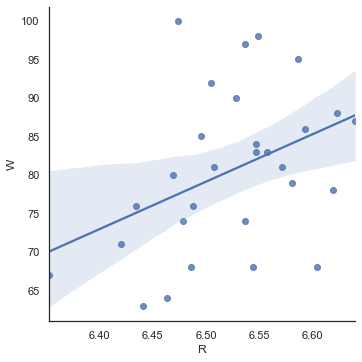

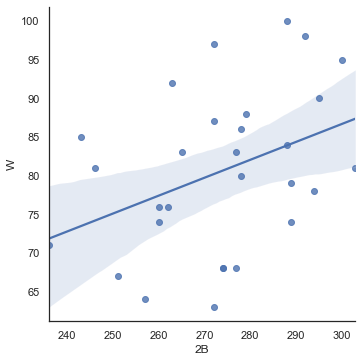

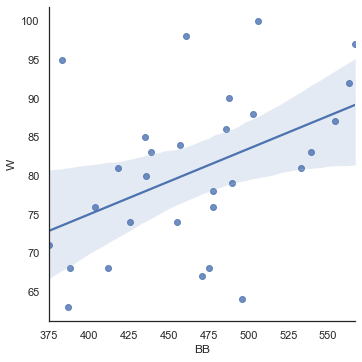

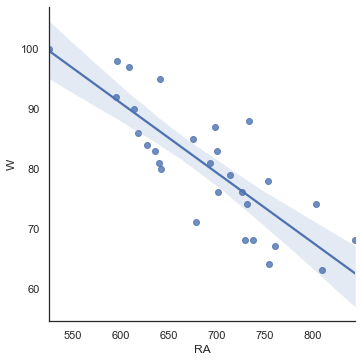

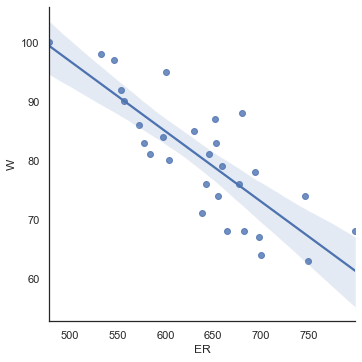

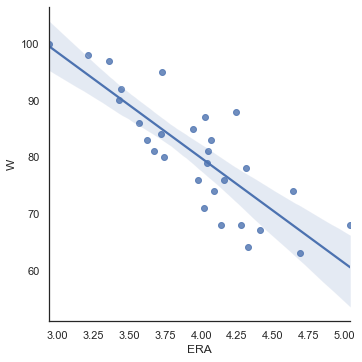

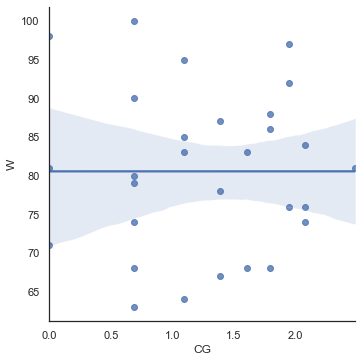

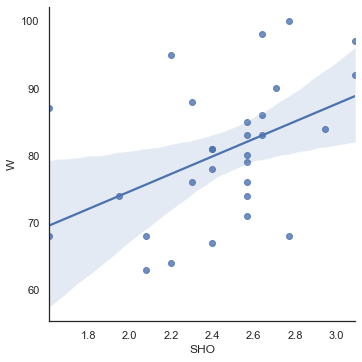

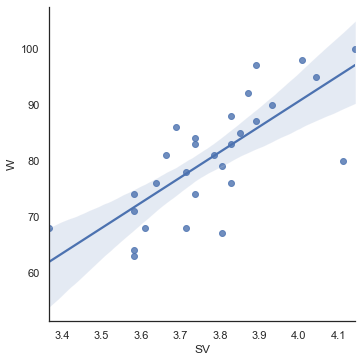

In [59]:
# this is a linear model plot

plt.figure(figsize=(20, 5))
sns.lmplot(data=df_new, x='R', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='2B', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='BB', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='RA', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='ER', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='ERA', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='CG', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='SHO', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='SV', y='W', fit_reg=True)

## Model Training

In [48]:
x = df.drop(['W'], axis = 1)
y = df['W']

In [49]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
x_scaled

array([[ 0.95271901,  0.83008422,  1.72372599,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.24041455, -0.72241314,  1.55481209,
        -0.43573324],
       [ 0.35665907, -0.70283074, -0.94984589,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.24041455,  0.31208451,  0.29622875,
        -0.59810993],
       [-0.24123892, -1.10025314, -0.08870013,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  1.81571095, -0.15787854, -0.67278738,
        -1.19738162],
       [-1.34193161,  0.23395062, -0.34774692, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.21433279, -0.42600884, -0.82526317,
         0.53829069],
       [ 0.20390224,  1.25589393,  2

# Checling for Multicollilneriaty

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,7.211037,R
1,18.757405,AB
2,9.612670,H
3,3.479347,2B
4,3.139667,3B
5,8.837972,HR
6,3.171199,BB
7,2.704195,SO
8,1.894704,SB
9,191.902272,RA


### ERA','ER','RA are very high we have to drop these values

In [52]:
X3 = x.drop(['ERA','ER','RA'], axis = 1)

In [53]:
x_scaled2 = scaler.fit_transform(X3)

In [54]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled2,i)for i in range(x_scaled2.shape[1])]
vif["features"]=X3.columns
vif

,vif,features
0,6.017769,R
1,4.719389,AB
2,6.844612,H
3,2.857053,2B
4,2.683938,3B
5,6.288496,HR
6,2.928257,BB
7,2.184093,SO
8,1.599222,SB
9,2.315584,CG


In [55]:
#splitting the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled2,y,test_size=0.30,random_state=340)
y_train.head()

19    64
20    90
29    68
6     87
11    86
Name: W, dtype: int64

In [56]:
print(x_train.shape,'\t',x_test.shape)

(21, 13) 	 (8, 13)


In [57]:
print(y_train.shape,'\t',y_test.shape)

(21,) 	 (8,)


### pipelines

In [62]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msd = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msd)

ScaledLR: -188.105085 (179.195230)
ScaledLasso: -41.619860 (27.732820)
ScaledEN: -56.268854 (33.767580)
ScaledKNN: -85.707333 (79.634656)
ScaledCART: -89.366667 (75.932602)
ScaledGBM: -50.965902 (47.897617)


#### By observing lasso gives best result

In [65]:
# creating parameter list to pass in Grid Search CV

parameter = {'alpha': np.arange(0, 1,0.01),
            'selection': ['cyclic', 'random'],
            'max_iter': np.arange(100,200,1000)}

In [66]:
GCV = GridSearchCV(Lasso(),parameter,cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'max_iter': array([100]),
                         'selection': ['cyclic', 'random']})

In [67]:
# Now we will find the best parameters

GCV.best_params_

{'alpha': 0.99, 'max_iter': 100, 'selection': 'cyclic'}

Text(0, 0.5, 'Predcited Values')

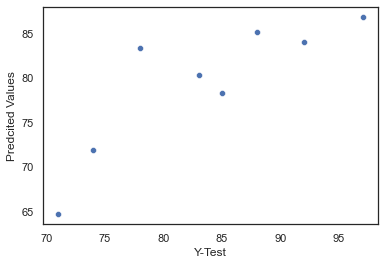

In [71]:
mod = Lasso(alpha=0.99, max_iter=100, selection='cyclic')
mod.fit(x_train, y_train)
prediction = mod.predict(x_test)
sns.scatterplot(y_test, prediction)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

###### Checking how much our predictions are correct

In [73]:
pred = mod.predict(x_test)

In [74]:
predictions = pd.DataFrame({"Predictions":prediction, "Real Value":y_test})

In [75]:
predictions.round(2)

,Predictions,Real Value
21,80.33,83
17,86.85,97
9,83.39,78
12,78.28,85
22,64.64,71
25,84.04,92
10,85.16,88
28,71.88,74


## Saving our model

In [76]:
import joblib
joblib.dump(mod,'Baseball.pkl')

['Baseball.pkl']

### Loading the save model

In [77]:
save = joblib.load('Baseball.pkl')
prediction1 = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction1)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction1)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction1))))

Mean Absolute Error: 5.525619440005723
Mean Squared Error: 37.585288111236565
Root Mean Squared Error: 6.13068414707825
